In [448]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk import word_tokenize
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

In [449]:
df = pd.read_csv('skills.csv')

In [450]:
df.groupby(['skills']).size()

skills
".Net" and WCF and (Anguar OR AngularJS OR Angular.JS) and JQuery                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [451]:
df.shape

(21943, 1)

In [452]:
df = df[df.skills.str.contains('telecommuting not available travel')==False]

In [453]:
df.skills = df.skills.str.lower()

In [454]:
from wordcloud import WordCloud, STOPWORDS

def word_cloud(data,color='black'):
    wordcloud = WordCloud(background_color=color, stopwords=STOPWORDS, max_words=200, max_font_size=40,  random_state=23)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(20, 20))
    plt.imshow(wordcloud)
    


In [455]:
def get_skil_frequancy(data):
    ret = dict()
    #print(data)
    token = data.split(',')
    print(token)
    print(len(token))
       

In [456]:
patterns = [(r'and', ', '),(r'\n',' '),(r'or',' '),(r'\\',' '),(r'/',' '),(r'\(',' '),(r'\)',' '),(r' +', ' ')
            ]

In [457]:

def replace_pattern(text):
    for (rgx,replace) in patterns:
        text = re.sub(rgx,replace,text)
    return text 

In [458]:
def remove_word(text):
    ret = list()
    for word in text.split():
        if word not in stop_words:
            ret.append(word)
    
    ret = ' '.join(ret)
    return ret        

In [459]:
text = ' '.join(df.skills)

In [460]:
text

'see below linux/unix, network monitoring, incident response, systems administration, security accessment enterprise solutions architecture, business inteligence, reports, reporting please see job description configuration management, developer, linux, management, process engineering, vmware fico, ar, ap, asset management, haha cisco, dns, http, networking, network engineer, security, video, vpn, wireless .net , c#, mvc, restful web services, http, aws, azure, oop c++, developer, development, javascript, user interface openstack unix, iam, scripting knowledge, oim, windows, linux java, oss consulting, project, sales, sales engineer mobile device qa lawson supply chain desktop, hardware, network, software, systems, windows analysis, analyst, application, business analyst, business requirements, excel, it, powerpoint, project system testing, load/performance testing, fix.fast, c/c++, java, windows, linux agile, case, consulting, defect management, manager, management, project, project ma

In [461]:
text = text.replace('\\',' ')
text = text.replace('/',',')
text = text.replace('and',',')

text = replace_pattern(text)
text = remove_word(text)

In [462]:
text

'see linux,unix, netw k monit ing, incident response, systems administration, security accessment enterprise solutions architecture, business inteligence, rep ts, rep ting please see job description configuration management, developer, linux, management, process engineering, vmware fico, ar, ap, asset management, haha cisco, dns, http, netw king, netw k engineer, security, video, vpn, wireless .net , c#, mvc, restful web services, http, aws, azure, oop c++, developer, development, javascript, user interface openstack unix, iam, scripting knowledge, oim, windows, linux java, oss consulting, project, sales, sales engineer mobile device qa lawson supply chain desktop, hardware, netw k, software, systems, windows analysis, analyst, application, business analyst, business requirements, excel, it, powerpoint, project system testing, load,perf mance testing, fix.fast, c,c++, java, windows, linux agile, case, consulting, defect management, manager, management, project, project management matla

In [463]:

def GetFreqCount(text):
    '''
    This method return dictonary of word with frequencies
    '''
    skill_cnt = {} 
    for skill_desc in text.split(',') :
        skill_desc = skill_desc.strip()
        skill_desc_words = skill_desc.split()
        if len(skill_desc_words) <= 3:
            if skill_desc in skill_cnt:
                skill_cnt[skill_desc] = skill_cnt[skill_desc]+1
                
            else:
                skill_cnt[skill_desc] = 1
    return  skill_cnt   


In [464]:
def ConvertDictToList(dic):
    '''
    This method convert dictonary to list data type
    '''
    dictList = list()
    for key in dic.items():
        temp = [key,dic[key]]
        dictList.append(temp)
    return dictList  
    

In [465]:
cnt = GetFreqCount(text)

In [466]:
cnt = pd.DataFrame(list(cnt.items()), columns=['skill', 'count'])

In [467]:
cnt.sort_values(['count'],ascending=False)

,skill,count
29,development,1696
120,sql,1613
8,management,1536
57,java,1403
30,javascript,1265
37,project,946
7,linux,932
82,,920
272,html,886
141,css,773


In [468]:
cnt[cnt.skill=='vmware']

,skill,count
274,vmware,286


In [469]:
def count_words(text):
    skill_desc_words = text.split()
    return len(skill_desc_words)
    

In [470]:
cnt['word_count'] = cnt.skill.apply(count_words)

In [471]:
#remove the uneccesassry list
noskill = ['development','project','management']

In [472]:
one_word_skills = cnt[(cnt['word_count']==True) & (~cnt.skill.isin(noskill))].sort_values(['count'],ascending=False)# ['development','project']

In [473]:
one_word_skills[one_word_skills['count']>10]

,skill,count,word_count
120,sql,1613,1
57,java,1403,1
30,javascript,1265,1
7,linux,932,1
272,html,886,1
141,css,773,1
111,python,731,1
19,security,696,1
23,c#,663,1
101,acle,631,1


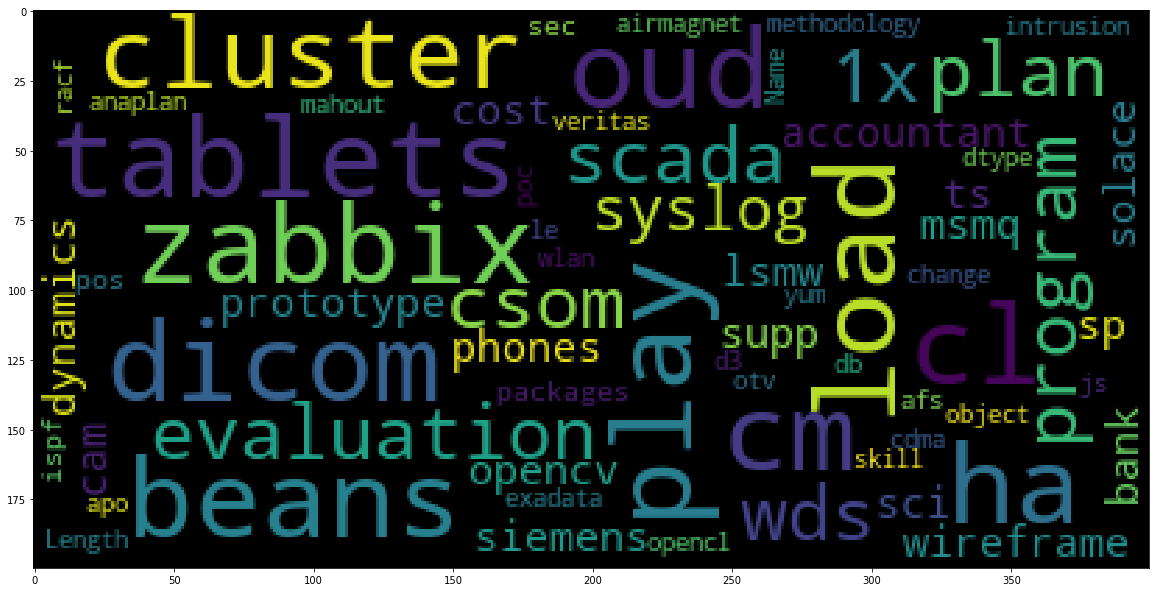

In [430]:
word_cloud(one_word_skills.skill)

In [431]:
one_word_skills.to_csv('one_word_skill.csv')

In [432]:
one_word_skills

,skill,count,word_count
52,load,4,1
6003,dicom,4,1
7434,tablets,4,1
7538,cl,4,1
7667,oud,4,1
7847,play,4,1
7877,beans,4,1
7884,zabbix,4,1
8143,cm,4,1
8160,ha,4,1
